# データ・サイエンティストへの道

[Kaggle](https://kaggle.com/)を用いた、より実践的にデータサイエンスを学び、練習する方法を紹介します。

![kaggle0-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/8ca39c89-4e94-a291-2927-7f9dec70fce3.png)

Kaggle と入門者向けコースウェア

<!--
https://www.codexa.net/kaggle-titanic-beginner/
-->

__いつももモジュールを準備__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try:
    import japanize_matplotlib #matplotlibの日本語化  
except ModuleNotFoundError:
    !pip install japanize_matplotlib
    import japanize_matplotlib 
sns.set(font="IPAexGothic") #日本語フォント設定

## Kaggle

Kaggleは、世界中のデータサイエンス・機械学習を学んでいる人、仕事で活用している人が、40万人以上集まるコミニティです。Kaggleでは、企業や政府などの組織とデータサイエンティストを繋げるコンペ形式のプラットフォームとなっています。

<div class="alert alert-info">

Competition（コンペ）

企業や政府がコンペ形式（競争形式）で課題を提示し、賞金と引き換えに最も制度の高い分析モデルを買い取る。
クラウドファンディングに近い仕組みになっています。

</div>

各コンペの利用規約へ同意をすると、データセットのダウロードが可能となります。
データセットを落として、自分でデータ分析を行い、最適な予測モデルを作ることができます。


また、過去のコンペのデータを利用して、練習することも可能になっています。



## タイタニック号の生存者予測

有名なタイタニック号の生存者予測の問題に挑戦してみましょう。

[タイタニック号の生存者予測(Kaggle)](https://www.kaggle.com/c/titanic/data) 

Kaggleの利用にはアカウント登録(無料)が必要となります。
データサイエンスをさらに深めて勉強するためには、会員登録しておきましょう。

次のふたつのファイルを入手します。

* `train.csv`: 訓練データ
* `test.csv`: テストデータ

<div class="alert alert-info">

英語

コンピュータ系の最新技術や話題は全て海外からきます。
英語が苦手であってもなくても、
ここから先は英語で書かれた情報を読み取るしかありません。

</div>

Pandas を用いて、データの確認をしましょう。


In [3]:
import pandas as pd 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

print('訓練データの大きさ', train.shape)
print('テストデータの大きさ', test.shape)
 

訓練データの大きさ (891, 12)
テストデータの大きさ (418, 11)


訓練データとテストデータが最初から別々になって提供されます。
コンペ形式なので、テストデータの正解はわかりません。

訓練データとテストデータを比較してみると、
`train.csv` は891件のデータ、`test.csv`は418名の乗客情報になります。
カラム数が異なるのは、訓練データには`Survived`のカラムがあります。
逆に、テストデータにはないので、この`Survived`を目的変数として予測するモデルを作ります。


### データの把握

まず、タイタニック号の乗客者名簿の属性をチェックしておきましょう。

* `PassengerId`: 乗客識別ユニークID
* `Survived`: 生存フラグ（0=死亡、1=生存）
* `Pclass`: チケットクラス
 1 上層クラス（お金持ち）
 2 中級クラス（一般階級）
 3 下層クラス（労働階級）
* `Name`: 乗客の名前
* `Sex`: 性別（male=男性、female＝女性）
* `Age`: 年齢
* `SibSp`: タイタニックに同乗している兄弟/配偶者の数
* `parch`: タイタニックに同乗している親/子供の数
* `ticket`: チケット番号
* `fare`: 料金
* `cabin`: 客室番号
* `Embarked`: 出港地
C = Cherbourg
Q = Queenstown
S = Southampton

 

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 予測モデルの作成

予測モデルの作成は、今まで習ってきた通りです。

* データの可視化＆前処理
* 説明変数を選ぶ
* 機械学習アルゴリズムを選ぶ
* 評価する

これ以外には色々な工夫があります。
コンペなので、自分で考えながら予測モデルを構築していきます。


### 提出方法

さて、無事に予測モデルが開発できたとしましょう。

コンペのページの「 Submit Predictions 」を開いて、そこの指示にしたがって提出します。

![kaggle2-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/4e95542a-2f60-2847-eae5-ec70dacddc8f.png)

提出方法は、コンペごとに少しづづ異なりますので、詳細は説明を読んでください。
ここは、[タイタニック号の生存者予測(Kaggle)](https://www.kaggle.com/c/titanic) の場合を説明します。

__まず、テストデータの予測値が得られたとします__
```
y_pred = model.predict(X_test)
```

提出は、テストデータの予測値を指定されたCSVファイルとして出力します。
ここは、`PassengerId`と`Survived`のふたつのカラムからなる表データです。

```python
import numpy as np
PassengerId = np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(y_pred, PassengerId, columns = ["Survived"])
my_solution.to_csv("result.csv", index_label = ["PassengerId"])
```

これで、`result.csv`ができました。
一応、ファイルも確認しておきましょう。

```python
!head result.csv #最初の10行を表示してみる

```

<div class="alert alert-warning">

予測値なので..

Survived のカラムの値は、作成した予測モデルに依存します。
一致する必要はありません。

</div>

指定されたCSVファイルができたら、ファイルを提出します。
しばし待つと、スコア（正解率）が表示されます。

![kaggle1-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/6ff723a8-7cd0-5a18-3961-4fe5b5bd6ce1.png)


<div class="alert alert-info">

Let's try

自分の予測モデルを作って、僕（倉光）のスコア（正解率）`0.77990`を超えてみよう。

</div>




## 初心者向けのヒント

ちょっと少しモデル作りに関するヒントを紹介しておきます。


### 欠損値を処理する

実際のデータ分析では、100%データセットが揃っていることはほとんどありません。
どこかの属性が一部欠けていたり、信用性が低くて使えないことがあります。
タイタニック号の乗客名簿は、何か嫌がらせかと思うほど、データが欠損しています。

__訓練データの欠損値__



In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<div class="alert alert-info">

ポイント：

この欠損した値をどう解釈し、予測モデルの構築に生かしていくのか？

</div>

実は、数多くあるKaggleのコンペの中から「タイタニック号の生存者予測」を選んだのは、
色々な人が解説をかいていて参考にする情報がWebに多く存在するからです。
それらを参考にしながら、よい方法（仮説）を考えてみてください。

<!--

train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})
y_test["Fare"] = y_test["Fare"].fillna(Xy_train["Fare"].mean())

-->


### 説明変数

カテゴリデータは、数値データに変換することで、説明変数として利用できるようになります。
例えば、性別は次のように0, 1に変換してみます。


In [8]:
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})


説明変数、目的変数を選びます。


In [9]:
X_train = train[["Pclass", "Sex", "Fare"]]
y_train = train["Survived"]
X_test = test[["Pclass", "Sex", "Fare"]]



### アルゴリズムを選ぶ

機械学習アルゴリズムを選びます。
今回は、２クラス分類問題なので、**分類器(Classifier)**の中から選びます。

機械学習アルゴリズムは、データの正室に対して、得意/不得意があります。
しかし、最初のうちは全くわからないので、色々試してみた方がよいでしょう。

ここでは、決定木を表示したかったので、`DecisionTreeClassifier`を使ってみました。


In [10]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

<div class="alert alert-warning">

訓練データに欠損値があると：

`ValueError: Input contains NaN, infinity or a value too large`のようなエラーが発生します。
データの前処理でしっかりと、取り除きましょう。 

</div>

さて、決定木のいいところは、どういう過程で分類されているか、見える化しやすいところです。


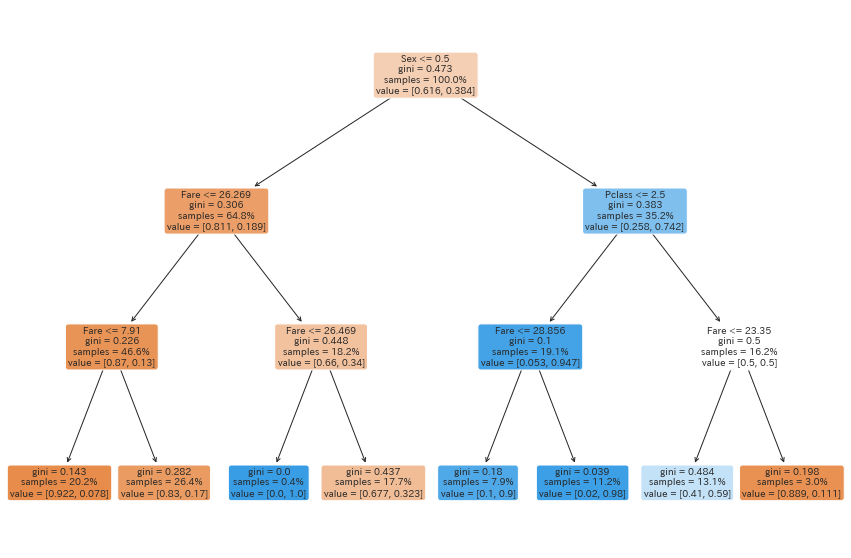

In [11]:
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=X_train.columns,filled=True, rounded=True, proportion=True)
plt.show()

訓練データに対する、正解率を計算しておきましょう。（テストデータは正解がないので計算できません。）

In [12]:
model.score(X_train, y_train)

0.8148148148148148

良い気がします。（maxdepthを深くすると、もっと精度は高くなります。）

### 提出データの作成

テストデータから予測値を求めて、提出データファイルを作成しましょう。


In [15]:
# Fare の前処理を忘れないで
# X_test["Fare"].fillna(X_test["Fare"].mean(), inplace=True) 
y_pred = model.predict(X_test)

<div class="alert alert-warning">

テストデータに欠損値があると：

`ValueError: Input contains NaN, infinity or a value too large`のようなエラーが発生します。
データの前処理でしっかりと、取り除きましょう。 
</div>

Pandasを使って表データに変換し、CSVファイルを出力します。

In [16]:
data = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
data.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
data.to_csv("result.csv", index=False)
!head result.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


<div class="alert alert-warning">

予測結果なので..

`Survived` のカラムの値は、作成した予測モデルに依存します。
一致する必要はありません。

</div>

指定されたCSVファイルができたら、ファイルを提出します。
しばし待つと、スコア（正解率）が表示されます。

![kaggle1-fs8.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/57754/6ff723a8-7cd0-5a18-3961-4fe5b5bd6ce1.png)



## 過学習を防ぐには

## コースワーク

どちらかにアカウント登録して、コンペに参加してみよう。

<div class="admonition tip">

**演習（Kaggle）**

Kaggle にアカウント登録し、
「タイタニック号の生存者」のコンペにチャレンジしてみよう。

</div>

<div class="admonition tip">

**演習（SIGNATE）**

SIGNATE社にアカウント登録し、
[お弁当屋さんの予測コンテスト](https://signate.jp/competitions/24)にチャレンジしてみよう。

</div>

